$CharacterEncoding::sjis: The byte sequence {148, 32} could not be interpreted as a character in the ShiftJIS character encoding.

{-Image-}
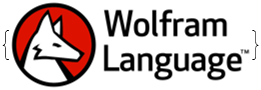

In [1]:
pdf = Import["https://content.wolfram.com/uploads/sites/10/2016/06/wolfram-language-text-logo.pdf"]

-Image-
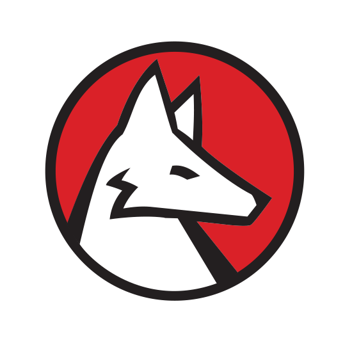

In [107]:
imgOrig = Import["https://content.wolfram.com/uploads/sites/10/2016/06/wolfram-language-logo.png"]

-Image-
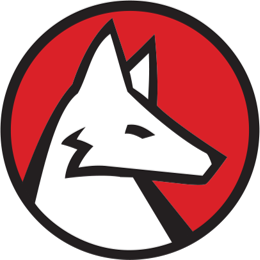

In [109]:
imgCrop = ImageCrop[imgOrig]

-Image-
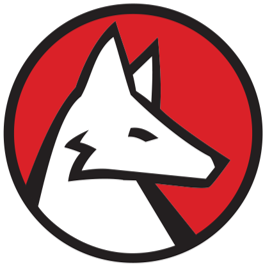

In [110]:
imgPad = ImagePad[imgCrop, 5, White]

In [111]:
colorLi = { Black, Red, White }

{GrayLevel[0], RGBColor[1, 0, 0], GrayLevel[1]}

{-Image-, -Image-, -Image-}
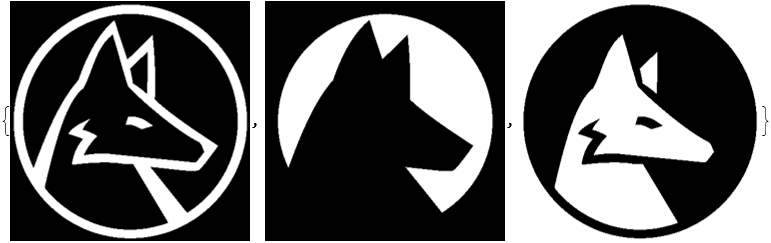

In [114]:
binImgLi = ColorNegate[Binarize[ColorDistance[imgPad, #], 0.5]]& /@ colorLi

{-Image-, -Image-, -Image-}
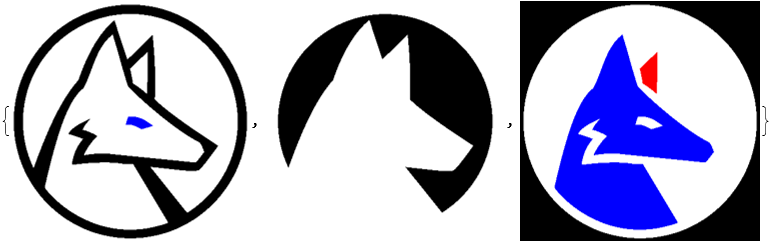

In [145]:
mcImgLi = MorphologicalComponents /@ binImgLi;
Colorize[#, ColorRules -> { 0 -> White, 1 -> Black, 2 -> Blue, 3 -> Red }] & /@ mcImgLi

In [123]:
findBoundary[img_] := Module[
  {
    imgData = ImageData[Binarize[ImagePad[ImagePad[img, -2], 2, 1]]],
    d = ( {
      { 0,  1 },
      { 1,  1 },
      { 1,  0 },
      { 1, -1 },
      { 0, -1 },
      {-1, -1 },
      {-1,  0 },
      {-1,  1 }
    } ),
    vec = 0,
    nextPointLi, offset, boundary
  },
  boundary = Position[imgData, 0, 2, 1];
  While[Length[boundary] == 1 || First[boundary] != Last[boundary],
    nextPointLi = 
    Select[
      RotateLeft[d, vec - 3],
      Extract[imgData, Last[boundary] + #] == 0 &
    ];
    If[nextPointLi == {}, Break[]];
    offset = First[nextPointLi];
    AppendTo[boundary, Last[boundary] + offset];
    vec = First[First[Position[d, offset]]] - 1;
  ];
  Return[Most[Reverse /@ boundary]];
]

{{-Image-, -Image-}, {-Image-}, {-Image-, -Image-, -Image-}}
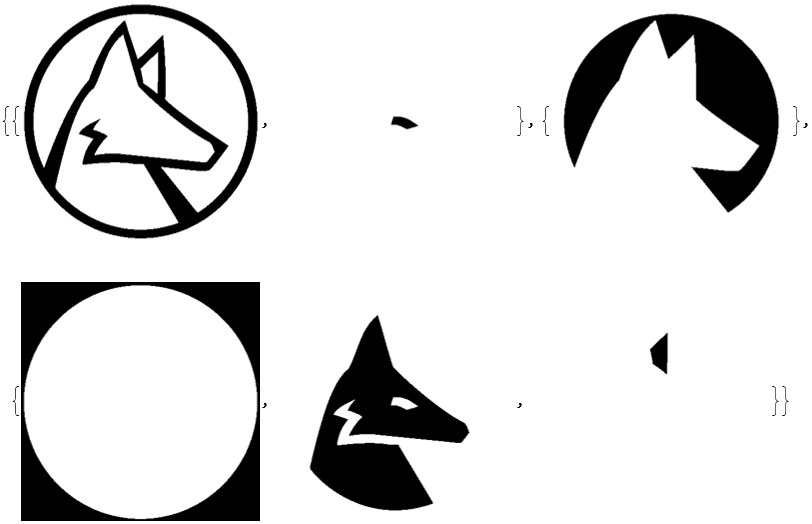

In [125]:
layerLi = Table[
    Image /@ Table[Unitize[mcImg - n], {n, 1, Max[mcImg]}],
    { mcImg, mcImgLi }
]

In [ ]:
lineImgLi = 